### Importing all the neccecary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

#### Filtering the data

In [2]:
def filter_data(dataset, features):
    filtered_data = dataset[features].values
    return filtered_data

### Kmeans

#### Training the Model

In [3]:
def train_kmeans(n_cluster,data):
    kmn_model = KMeans(n_clusters=n_cluster, n_init='auto')
    kmn_model.fit(data)
    labels = kmn_model.predict(data)
    print("Cluster Labels:", labels)
    return labels, kmn_model

#### Plotting the kmeans on all Combinations

In [4]:
def plot_kmeans(data, kmn_model, feature_names):
    num_features = data.shape[1]
    centroids = kmn_model.cluster_centers_
    labels = kmn_model.labels_
    
    feature_combinations = list(itertools.combinations(range(num_features), 2))
    
    for comb in feature_combinations:
        xs_n, ys_n = comb
        xs = data[:, xs_n]
        ys = data[:, ys_n]
        
        plt.scatter(xs, ys, c=labels, cmap='viridis', alpha=0.6)
        plt.scatter(centroids[:, xs_n], centroids[:, ys_n], 
                    marker='x', s=150, c='red', label='Centroids')
        
        plt.xlabel(feature_names[xs_n])
        plt.ylabel(feature_names[ys_n])
        plt.title(f'KMeans Clustering: {feature_names[xs_n]} vs {feature_names[ys_n]}')
        plt.legend()
        plt.show()

#### Calculating inertia

In [5]:
def calculate_inertia(data, min_count=1, max_count=10):
    inertia_list = []
    for cluster_count in np.arange(min_count, max_count):  
        kmn_model = KMeans(n_clusters=cluster_count, n_init='auto')
        kmn_model.fit(data)
        inertia_list.append(kmn_model.inertia_)
    return inertia_list

#### Plotting the inertia

In [6]:
def plot_inertia(inertia_list, start=1, end=10):    
    plt.plot(np.arange(start, end), inertia_list, 'ro-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia vs Number of Clusters')
    plt.show()

#### K-means Algorithm

In [7]:
def run_kmeans(dataset, selected_feature_names, cluster_count=3, max_cluster_count=15):
  filtered_data = filter_data(dataset, selected_feature_names)
  labels, kmn_model = train_kmeans(cluster_count, filtered_data)
  plot_kmeans(filtered_data, kmn_model, selected_feature_names)
  inertia_list = calculate_inertia(filtered_data, 1, max_cluster_count)
  plot_inertia(inertia_list, 1, max_cluster_count)

### Hierarchical

In [8]:
def perform_clustering(data, num_clusters, method):
    linkage_matrix = linkage(data, method=method)
    cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

In [9]:
def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, leaf_rotation=90)
    plt.title("Dendrogram (Hierarchical Clustering)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

In [10]:
def plot_clusters(data, labels, features):
    if data.shape[1] == 2:
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.title("Hierarchical Clustering (Scatter Plot)")
        plt.show()
    else:
        print("Scatter plot not shown as the number of features is greater than 2.")

In [11]:
def run_hierarchical(dataset, features, num_clusters=3, method='complete'):
    filtered_data = filter_data(dataset, features)
    linkage_matrix, cluster_labels = perform_clustering(filtered_data, num_clusters, method)
    plot_dendrogram(linkage_matrix)
    plot_clusters(filtered_data, cluster_labels, features)
    return cluster_labels

### Running the Algorithms on our data

#### Getting the data ready

In [12]:
heart_disease_data = pd.read_csv("heart_disease_dataset.csv")
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


#### Kmeans

Cluster Labels: [0 2 0 0 0 0 2 2 2 0 0 2 2 2 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 2 2 0 0 0 2 0 2 0 0 0 1 0 0 0 2 0 2 2 0 0 2 0 2 0 0 2 0 2 0 0 2 0 2 2 2 0
 0 1 2 2 0 2 0 2 2 2 2 0 2 0 0 2 2 0 0 0 2 2 0 2 0 0 2 0 2 2 0 2 0 0 2 0 2
 0 0 2 2 0 0 0 2 2 2 1 0 0 2 0 2 0 0 0 2 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 2 0
 2 2 2 2 1 2 0 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 2 1 0 2 0 0 2 0 2 1 0 2 2
 0 0 0 2 2 0 2 0 2 0 2 0 0 0 2 2 2 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2
 0 2 2 0 0 2 0 0 0 2 0 2 0 2 2 0 2 2 0 2 2 0 0 0 0 2 0 0 0 0 2 2 2 0 0 0 0
 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0]


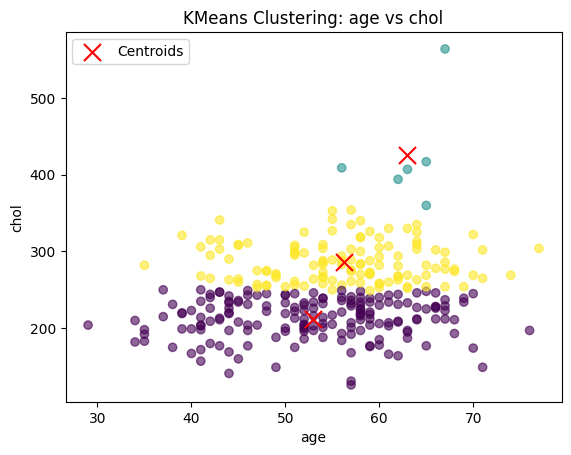

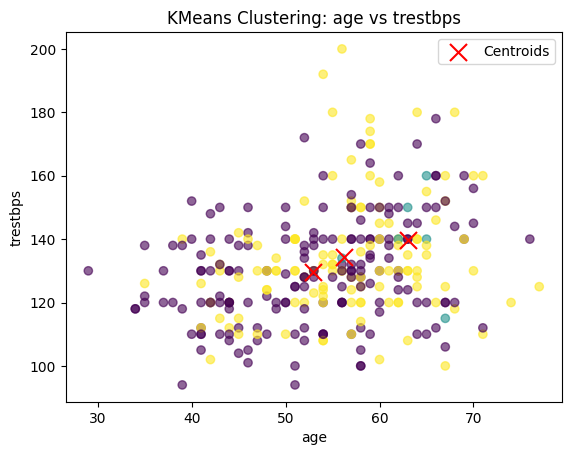

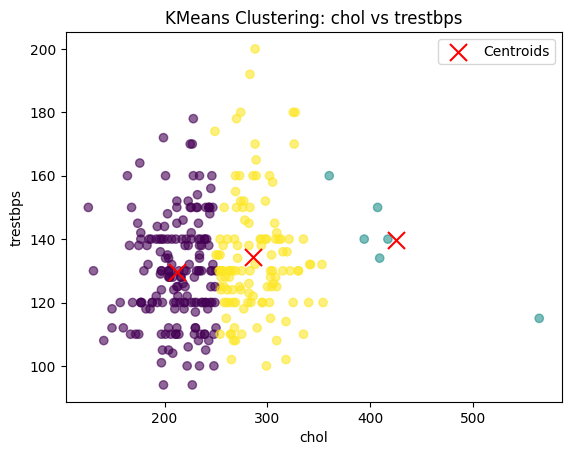

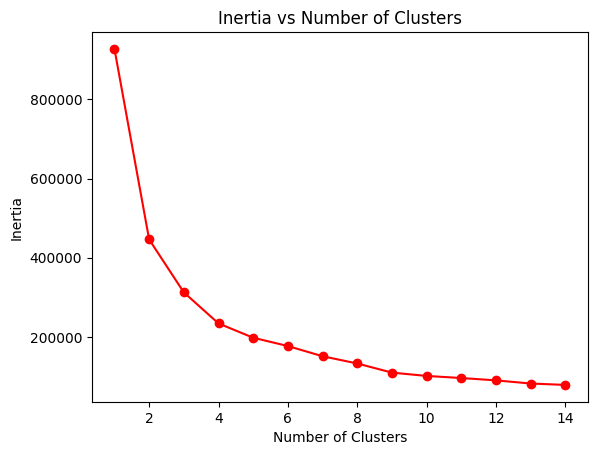

In [13]:
run_kmeans(heart_disease_data, ["age", "chol", "trestbps"])

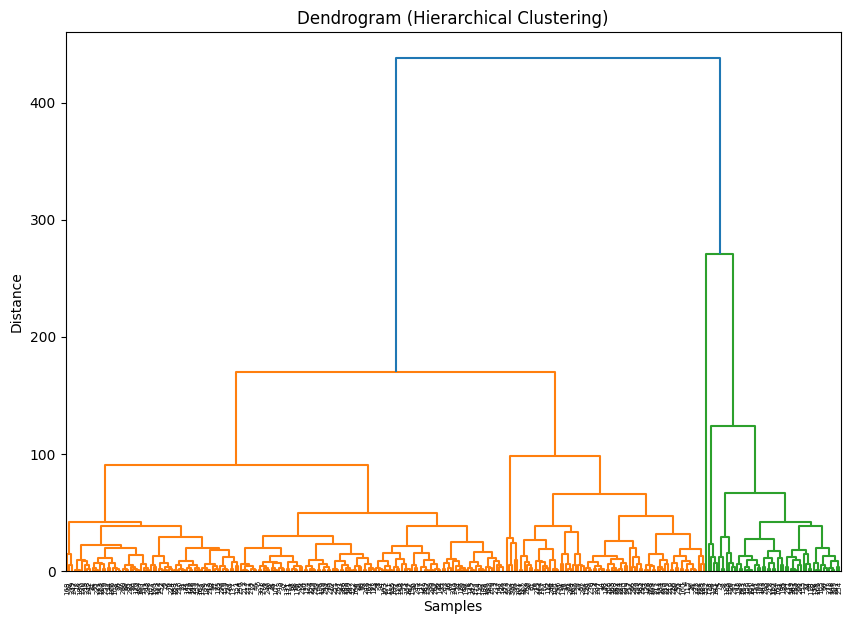

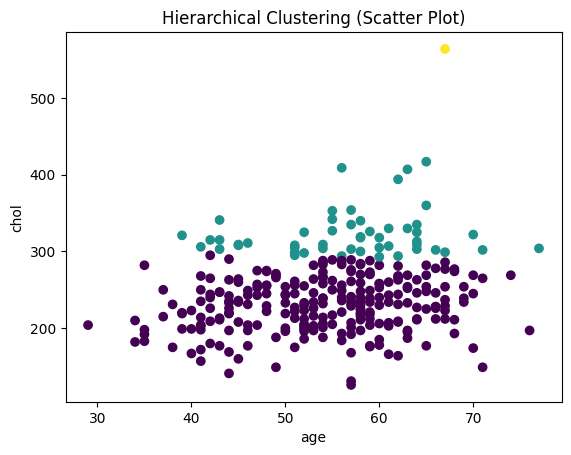

Cluster Labels: [1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1
 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2
 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 2 2 1 3 1 1 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2
 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1]


In [14]:
cluster_labels = run_hierarchical(heart_disease_data, ["age", "chol"], num_clusters=3)
print("Cluster Labels:", cluster_labels)